In [10]:
import rhinoMorph
rn = rhinoMorph.startRhino()

path = "c:\\pytest\\data\\"


filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


In [8]:
with open(path+'data.txt') as f:
    data = [sen.split('\t') for sen in f.read().split('\n')]


In [24]:
morphed_data = ''
for each_data in data:
    morphed_each_data = rhinoMorph.onlyMorph_list(rn, each_data[0],
                                                  pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'VX', 'XR', 'IC', 'MM', 'MAG'])
    joined_morphed_each_data = ' '.join(morphed_each_data)
    if joined_morphed_each_data:
        morphed_data += joined_morphed_each_data + "\t" + each_data[1] + "\n"
print('Morphological Analysis Completed.')

with open(path+'chat_morphed.txt', 'w', encoding='cp949') as f:
    f.write(morphed_data)


Morphological Analysis Completed.


In [25]:
joined_morphed_each_data

''

In [26]:
with open(path+ 'chat_morphed.txt', encoding='cp949') as f:
    data = [sen.split('\t') for sen in  f.read().split('\n')]

In [28]:
data[-2]

['제품 배송비 없 주문 금액 얼마', '배송비']

In [ ]:
# train, validation, test
# train: 모델 학습용 데이터
# validation: 모델을 한번 학습할 때마다(1 epoch) 성능의 평가를 위해 사용되는 데이터
# test: 모델 학습이 끝나고, 최종 평가에 사용될 데이터

In [33]:
data_text = [line[0] for line in data[:-1]]
data_label = [line[1] for line in data[:-1]]


In [35]:
data_label

['매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 '매장코드',
 

In [36]:
from sklearn.model_selection import train_test_split
train_data_text, test_data_text, train_data_label, test_data_label = train_test_split(
    data_text, data_label, stratify=data_label)


In [38]:
from collections import Counter
train_data_label_freq = Counter(train_data_label)
test_data_label_freq = Counter(test_data_label)
print(f"train_data_label_freq: {train_data_label_freq}")
print(f"test_data_label_freq: {test_data_label_freq}")


train_data_label_freq: Counter({'반품문의': 1422, '교환문의': 989, '배송문의': 705, '담당자문의': 517, '샘플문의': 460, '매장코드': 234, '배송비': 192, '청구금액': 107, '제품가격': 75, '제품불일치': 40})
test_data_label_freq: Counter({'반품문의': 474, '교환문의': 330, '배송문의': 236, '담당자문의': 172, '샘플문의': 153, '매장코드': 78, '배송비': 64, '청구금액': 36, '제품가격': 25, '제품불일치': 13})


In [42]:
import numpy as np
text_len = [len(line.split()) for line in train_data_text]
print(f"최소길이: {np.min(text_len)}")
print(f"최대길이: {np.max(text_len)}")
print(f"평균길이: {np.round(np.mean(text_len),1)}")
print(f"중위수길이: {np.median(text_len)}")
print(f"구간별 최대 길이: {np.percentile(text_len, [0,25,75,90,95,97,98,99,100])}")
print(f"최소길이 문장: {train_data_text[np.argmin(text_len)]}")
print(f"최대길이 문장: {train_data_text[np.argmax(text_len)]}")


최소길이: 2
최대길이: 17
평균길이: 6.4
중위수길이: 6.0
구간별 최대 길이: [ 2.  5.  7.  8.  9.  9. 10. 10. 17.]
최소길이 문장: 샘플 신청
최대길이 문장: 박스 외부 표기 되 제품 내부 포장 되 있 제품 일치 않 어떻하 하 하 알리 주


In [43]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np
import math

max_words=1000
maxlen=20

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index=tokenizer.word_index

In [44]:
len(word_index)

192

In [46]:
type(word_index)

dict

In [47]:
word_index

{'하': 1,
 '확인': 2,
 '어떻하': 3,
 '있': 4,
 '제품': 5,
 '반품': 6,
 '어디': 7,
 '교환': 8,
 '가능': 9,
 '주': 10,
 '달': 11,
 '조회': 12,
 '이번': 13,
 '배송': 14,
 '알리': 15,
 '주문': 16,
 '영업': 17,
 '샘플': 18,
 '되': 19,
 '내역': 20,
 '신청': 21,
 '언제': 22,
 '번호': 23,
 '담당자': 24,
 '개봉': 25,
 '마감일': 26,
 '싶': 27,
 '회수': 28,
 '도착': 29,
 '금액': 30,
 '당일': 31,
 '상품': 32,
 '코드': 33,
 '궁금': 34,
 '받': 35,
 '시간': 36,
 '알': 37,
 '드리': 38,
 '배송비': 39,
 '개수': 40,
 '부탁': 41,
 '연락처': 42,
 '사원': 43,
 '대상': 44,
 '저희': 45,
 '일정': 46,
 '얼마': 47,
 '지': 48,
 '정하': 49,
 '방법': 50,
 '매장': 51,
 '안경원': 52,
 '보': 53,
 '여부': 54,
 '품목': 55,
 '방문': 56,
 '없이': 57,
 '수량': 58,
 '환불': 59,
 '요청': 60,
 '청구': 61,
 '이상': 62,
 '소비자': 63,
 '날짜': 64,
 '능': 65,
 '수령일': 66,
 '공급가': 67,
 '전화': 68,
 '한': 69,
 '통화': 70,
 '문의': 71,
 '법': 72,
 '얼마나': 73,
 '대금': 74,
 '청구서': 75,
 '않': 76,
 '동일': 77,
 '없': 78,
 '이력': 79,
 '저번': 80,
 '안': 81,
 '가': 82,
 '마감': 83,
 '포장': 84,
 '같': 85,
 '수': 86,
 '붙': 87,
 '내부': 88,
 '그룹': 89,
 '표기': 90,
 '지금': 91,
 '박스': 92,
 '일자':

In [48]:
sample1 = [['사과 감자 옥수수'], ['딸기 감자 옥수수'], ['양파 감자 옥수수'], ['양파 부추 옥수수']]
sample2 = [['사과', '감자', '옥수수'], ['너희', '감자', '옥수수'], ['그들', '감자', '옥수수'], ['양파', '부추', '옥수수']]
sample3 = ['사과 감자 옥수수 너희 그들 양파 부추']
sample4 = ['사과', '감자', '옥수수', '너희', '그들', '양파', '부추']
tokenizer.fit_on_texts(sample1)

In [50]:
sample1 = [['사과 감자 옥수수'], ['딸기 감자 옥수수'], ['양파 감자 옥수수'], ['양파 부추 옥수수']]
tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(sample1)
word_index2 = tokenizer2.word_index
print('word_index: ',word_index2)

word_index:  {'사과 감자 옥수수': 1, '딸기 감자 옥수수': 2, '양파 감자 옥수수': 3, '양파 부추 옥수수': 4}


In [54]:
data = tokenizer.texts_to_sequences(train_data_text)
# print("data:", data)
len_d= [len(d) for d in data]
# print("길이", len_d)
print("최대문장길이: ", max(len_d))
print("최소문장길이: ", min(len_d))

최대문장길이:  17
최소문장길이:  2


In [55]:
data = pad_sequences(data, maxlen=maxlen)
print(data[0])
print(len(data[0]))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24 42  2  3  1]
20


In [56]:
train_data_text[0]

'담당자 연락처 확인 어떻하 하'

In [64]:
f = dict(zip(word_index.values(), word_index.keys()))

In [69]:
translate = data[1]
for i in translate:
    if i!=0:
        print(f[i], end='')

저희매장샘플받싶어디신청있

In [71]:
sample=[[5,6,7],[8,9,10]]
arr=np.zeros((len(sample),10+1))
for i,seq in enumerate(sample):
    arr[i,seq]=1
arr


array([[0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [75]:
translate = sample[1]
for i in translate:
    if i!=0:
        print(f[i], end='')

교환가능주

In [74]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train=to_one_hot(data, dimension=max_words)

In [77]:
print('train_data_texttype:', type(train_data_text))
print(len(train_data_text[0]))
print('texts 0:', train_data_text[0])
print('data type:', type(x_train))
print(len(x_train[0]))
print('x_train[0][0:100]:', x_train[0][0:100])

train_data_texttype: <class 'list'>
16
texts 0: 담당자 연락처 확인 어떻하 하
data type: <class 'numpy.ndarray'>
1000
x_train[0][0:100]: [1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


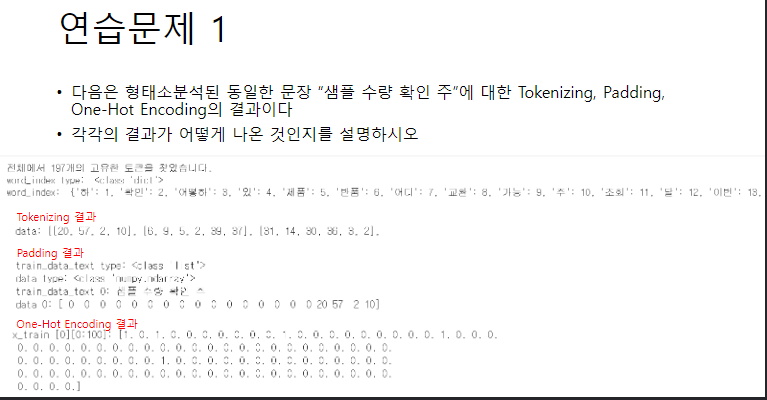

### 연습문제1

* '샘플 수량 확인 주'라는 문장을 공백 기준 llist array로 만들어 word_index 딕셔너리의 값으로 치환을 한 결과
[20, 57, 2, 10]이 되었다. 다른 문장도 동일한 과정으로 문장을 단어 리스트로 변경후 숫자로 치환한다. 이러한 과정을 Tokenizing이라고 한다. 바꿀 숫자는 토크나이징 과정에서 나오는 word_index를 참조하여 바꾸며, 아래 그림과 같다.

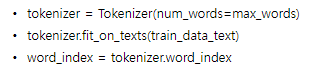

* [20, 57, 2, 10]의 list array를 [0 0 0 0 0 0 ... 20 57 2 10]의 ndarray형식으로 바꾸는 과정을 padding이라고 하는데, 먼저 모든 array의 길이를 일률화 시켜주기 위해 array의 길이를 정해준다. 보통 maxlen변수로 할당한다.
maxlen의 숫자는 적절히 모든 문장 list의 length를 보고 결정하는데 np.percentile 80-90% 사이의 길이로 하면 적당할 수 있다. 문장 list의 길이가 maxlen보다 많으면 문장 뒤에가 잘리고(기본옵션), 짧으면 앞에 0으로 채워지게 된다(기본옵션). 위와 같은 일련의 과정을 padding이라 한다. 데이터 길이를 동일하게 맞추는 작업.

* [0 0 0 0 ... 20 57 2 10]인 문장 ndarray를 단어의 빈도 및 숫자를 고려하지 않고, 주어진 단어 목록 컬럼에 없으면 0, 있으면 1로 나타내는 것을 One-Hot Encoding이라고 한다. array 0번째 자리는 보통 padding할때 공백의 존재 유무를 나타낸다. 주어진 단어 목록 컬럼은 word_index를 말한다.

In [91]:
# data_label
def labelToIint(labels):
    for count,label in enumerate(labels):
        if label=="배송비":
            labels[count]=0
        elif label=="담당자문의":
            labels[count]=1
        elif label=="제품가격":
            labels[count]=2
        elif label=="배송문의":
            labels[count]=3
        elif label=="매장코드":
            labels[count]=4
        elif label=="샘플문의":
            labels[count]=5
        elif label=="제품불일치":
            labels[count]=6
        elif label=="반품문의":
            labels[count]=7
        elif label=="교환문의":
            labels[count]=8
        elif label=="청구금액":
            labels[count]=9
    return labels

In [92]:
print(train_data_label[:3])
train_data_label = labelToIint(train_data_label)
print(f"치환 후: {train_data_label[:3]}")

[1, 5, 8]
치환 후: [1, 5, 8]


In [93]:
print(test_data_label[:3])
test_data_label = labelToIint(test_data_label)
print(f"치환 후: {test_data_label[:3]}")

[7, 3, 5]
치환 후: [7, 3, 5]


In [95]:
class_number = 10
y_train = to_one_hot(train_data_label, dimension=class_number)
print(y_train)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [99]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [100]:
data_test = tokenizer.texts_to_sequences(test_data_text)
data_test = pad_sequences(data_test, maxlen=maxlen)
x_test = to_one_hot(data_test, dimension=max_words)
y_test = to_one_hot(test_data_label, dimension=class_number)
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [102]:
x_train.shape

(4741, 1000)

In [103]:
y_train.shape

(4741, 10)

In [104]:
x_test.shape

(1581, 1000)

In [105]:
y_test.shape

(1581, 10)

In [106]:
epochs = 20
batch_size = 32
model_name = 'train_data_morphed.h5'
tokenizer_name = 'train_data_morphed.pickle'

In [107]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(class_number, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                64064     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 66,474
Trainable params: 66,474
Non-trainable params: 0
_________________________________________________________________


In [109]:
from keras.callbacks import EarlyStopping
import os
checkpoint_path = 'c:\\projects\\model\\'
checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists\n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder created\n".format(checkpoint_dir))


c:\projects\model -- Folder already exists



In [110]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='acc')

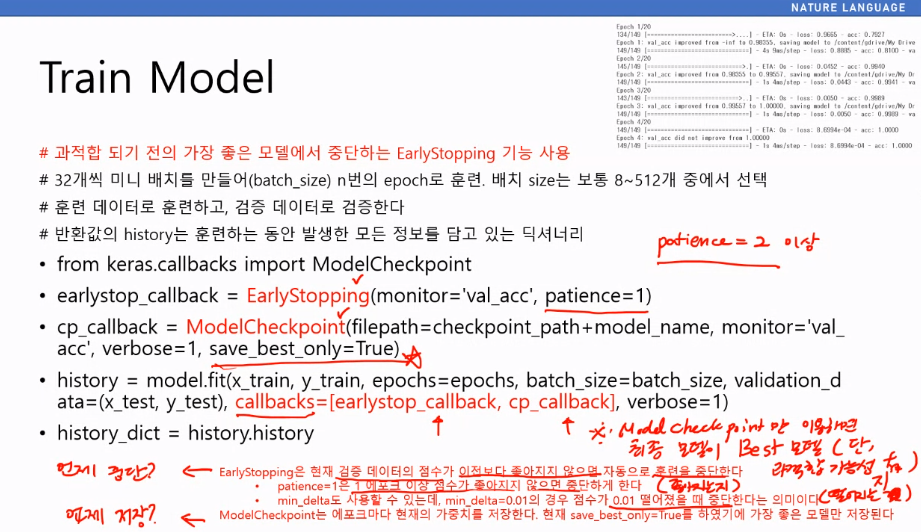

In [115]:
from keras.callbacks import ModelCheckpoint
earlystop_callback = EarlyStopping(monitor='val_loss', patience=2)
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path+model_name, monitor='val_loss', verbose=1, save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history


Epoch 1/20
141/149 [===========================>..] - ETA: 0s - loss: 3.6671e-08 - acc: 1.0000
Epoch 1: val_loss improved from inf to 0.00000, saving model to c:\projects\model\train_data_morphed.h5
149/149 [==============================] - 1s 9ms/step - loss: 3.5478e-08 - acc: 1.0000 - val_loss: 6.6215e-07 - val_acc: 1.0000
Epoch 2/20
141/149 [===========================>..] - ETA: 0s - loss: 2.2404e-08 - acc: 1.0000
Epoch 2: val_loss improved from 0.00000 to 0.00000, saving model to c:\projects\model\train_data_morphed.h5
149/149 [==============================] - 1s 8ms/step - loss: 2.3133e-08 - acc: 1.0000 - val_loss: 4.9194e-07 - val_acc: 1.0000
Epoch 3/20
146/149 [============================>.] - ETA: 0s - loss: 1.5156e-08 - acc: 1.0000
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to c:\projects\model\train_data_morphed.h5
149/149 [==============================] - 1s 8ms/step - loss: 1.5212e-08 - acc: 1.0000 - val_loss: 4.3186e-07 - val_acc: 1.0000
Epoch 4/

In [116]:
import pickle

In [118]:
with open(tokenizer_name, 'wb') as f:
    pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(f"validation accuracy of each epoch: {np.round(val_acc, 3)}")
epochs = range(1, len(val_acc)+1)


validation accuracy of each epoch: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


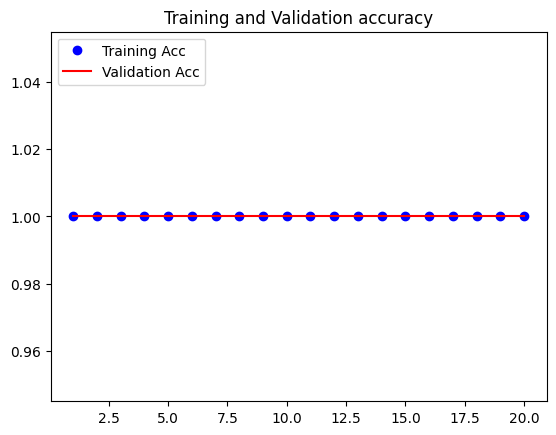

In [122]:
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation accuracy')
plt.legend(loc=2)
plt.show()

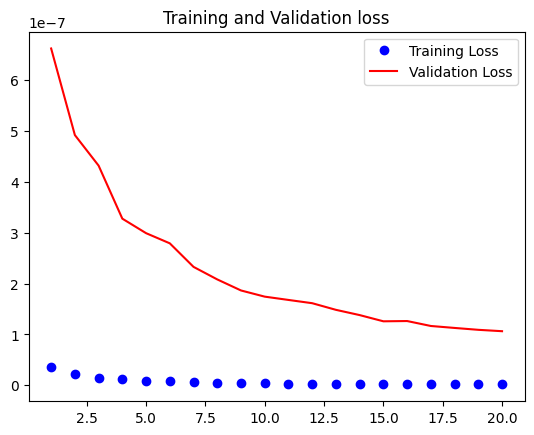

In [123]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=1)
plt.show()


In [127]:
from keras.models import load_model
loaded_model = load_model('c:\\projects\\model\\'+model_name)
with open(tokenizer_name, 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)


In [129]:
test_eval= loaded_model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 4ms/step - loss: 1.0639e-07 - acc: 1.0000


In [130]:
print('prediction model loss & acc:', test_eval)

prediction model loss & acc: [1.0638852643296559e-07, 1.0]


In [131]:
%load_ext tensorboard

In [134]:
import datetime
import tensorflow as tf
log_dir = "c:\\projects\\model\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [135]:
from keras.callbacks import ModelCheckpoint
earlystop_callback = EarlyStopping(monitor='val_loss', patience=2)
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path+model_name, monitor='val_loss', verbose=1, save_best_only=True)
history = model.fit(x_train, y_train, epochs=20, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[earlystop_callback, cp_callback, tensorboard_callback], verbose=1)
history_dict = history.history


Epoch 1/20
149/149 [==============================] - ETA: 0s - loss: 1.5087e-09 - acc: 1.0000
Epoch 1: val_loss improved from inf to 0.00000, saving model to c:\projects\model\train_data_morphed.h5
149/149 [==============================] - 1s 9ms/step - loss: 1.5087e-09 - acc: 1.0000 - val_loss: 1.0330e-07 - val_acc: 1.0000
Epoch 2/20
145/149 [============================>.] - ETA: 0s - loss: 1.4644e-09 - acc: 1.0000
Epoch 2: val_loss improved from 0.00000 to 0.00000, saving model to c:\projects\model\train_data_morphed.h5
149/149 [==============================] - 1s 10ms/step - loss: 1.4332e-09 - acc: 1.0000 - val_loss: 1.0013e-07 - val_acc: 1.0000
Epoch 3/20
146/149 [============================>.] - ETA: 0s - loss: 1.4544e-09 - acc: 1.0000
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to c:\projects\model\train_data_morphed.h5
149/149 [==============================] - 1s 10ms/step - loss: 1.4332e-09 - acc: 1.0000 - val_loss: 9.7793e-08 - val_acc: 1.0000
Epoch 

In [ ]:
%tensorboard --logdir logs/fit

In [136]:
def intToLabel(label_int):
    labels = ''
    if label_int == 0:
        labels = '20,000원 이상 주문하시면 배송비가 없습니다'
    if label_int == 1:
        labels = '담당자는 홈페이지에 직원의 이름 또는 사번을 넣으시면 자세한 정보를 알 수 있습니다'
    if label_int == 2:
        labels = '공급가와 소비자가는 홈페이지 > 직원 ID 로그인 > 물품명 > 가격조회 에서 확인 가능합니다'
    if label_int == 3:
        labels = '배송에는 보통 2일이 소요되며, 빠른 배송을 선택하시면 1일 안에 책임배달합니다'
    if label_int == 4:
        labels = '매장 코드는 홈페이지 > 매장정보 에서 확인 가능합니다'
    if label_int == 5:
        labels = '샘플신청은 홈페이지 > 직원 ID 로그인 > 물품명 > 샘플신청 에서 가능합니다'
    if label_int == 6:
        labels = '다른 제품이 배송되어 죄송합니다. 홈페이지 > 물품명 > 환불신청 또는 전화 상담 부탁드립니다'
    if label_int == 7:
        labels = '배송받으신 모든 제품은 7일 안에는 반품이 가능합니다. 홈페이지 > 물품명 > 환불신청 에서 반품 가능합니다'
    if label_int == 8:
        labels = '배송받으신 모든 제품은 7일 안에는 교환이 가능합니다. 홈페이지 > 물품명 > 교환신청 에서 교환 가능합니다'
    if label_int == 9:
        labels = '청구금액은 매달 12일 이후에 홈페이지 > 직원 ID 로그인 > 청구금액에서 확인 가능합니다'
    return labels


In [141]:
user_input = input("내용을입력하세요: ")
if user_input=='':
    user_input = "배송기간은 어떻게 돼?"
morphed_input = rhinoMorph.onlyMorph_list(rn, user_input, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'VCN', 'MAG', 'MAJ', 'IC'])
text = [morphed_input]
data = loaded_tokenizer.texts_to_sequences(text)
data = pad_sequences(data, maxlen=maxlen)
x_test = to_one_hot(data, dimension=max_words)
prediction = loaded_model.predict(x_test)
label_int = np.argmax(prediction)
label = intToLabel(label_int)
print(label)


1/1 [==============================] - 0s 25ms/step
다른 제품이 배송되어 죄송합니다. 홈페이지 > 물품명 > 환불신청 또는 전화 상담 부탁드립니다


In [142]:
prediction

array([[0.01197881, 0.00216073, 0.13236037, 0.00539129, 0.00188256,
        0.00201452, 0.80394953, 0.01190512, 0.0099524 , 0.01840473]],
      dtype=float32)

In [147]:
test_list = ["제품을 교환하고 싶어요", "매장 코드 번호 확인은 어떻게 해요?", "이번 달 청구금액 확인은 어디서 하나요?", "제품에 표기된 제품과 내부포장 제품이 다른데 어떡하죠?", "담당자 번호 확인은 어떻게 해요?", "이번 달 반품 마감일 확인 어디서 가능합니까?", "배송 제품은 언제 도착하나요?", "샘플 신청은 어떻게 하나요?", "제품의 공급가와 소비자가 알고싶어요", "얼마이상 주문해야 배송비 안 붙나요?", "언제와?", "반품좀"]

def qna(user_input):
    morphed_input = rhinoMorph.onlyMorph_list(rn, user_input, pos=[ 'NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'VCN', 'MAG', 'MAJ', 'IC'])
    text = [morphed_input]
    data = loaded_tokenizer.texts_to_sequences(text)
    data = pad_sequences(data, maxlen=maxlen)
    x_test = to_one_hot(data, dimension=max_words)
    prediction = loaded_model.predict(x_test)
    label_int = np.argmax(prediction)
    label = intToLabel(label_int)
    print(label)


for user_input in test_list:
    print(user_input)
    qna(user_input)
    print('*****************\n')


제품을 교환하고 싶어요
1/1 [==============================] - 0s 21ms/step
배송받으신 모든 제품은 7일 안에는 교환이 가능합니다. 홈페이지 > 물품명 > 교환신청 에서 교환 가능합니다
*****************

매장 코드 번호 확인은 어떻게 해요?
1/1 [==============================] - 0s 19ms/step
매장 코드는 홈페이지 > 매장정보 에서 확인 가능합니다
*****************

이번 달 청구금액 확인은 어디서 하나요?
1/1 [==============================] - 0s 25ms/step
청구금액은 매달 12일 이후에 홈페이지 > 직원 ID 로그인 > 청구금액에서 확인 가능합니다
*****************

제품에 표기된 제품과 내부포장 제품이 다른데 어떡하죠?
1/1 [==============================] - 0s 19ms/step
다른 제품이 배송되어 죄송합니다. 홈페이지 > 물품명 > 환불신청 또는 전화 상담 부탁드립니다
*****************

담당자 번호 확인은 어떻게 해요?
1/1 [==============================] - 0s 28ms/step
담당자는 홈페이지에 직원의 이름 또는 사번을 넣으시면 자세한 정보를 알 수 있습니다
*****************

이번 달 반품 마감일 확인 어디서 가능합니까?
1/1 [==============================] - 0s 18ms/step
배송받으신 모든 제품은 7일 안에는 반품이 가능합니다. 홈페이지 > 물품명 > 환불신청 에서 반품 가능합니다
*****************

배송 제품은 언제 도착하나요?
1/1 [==============================] - 0s 23ms/step
배송에는 보통 2일이 소요되며, 빠른 배송을 선택하시면 1일 안에 책임배달합니다
*****************

샘플 

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

path = "C:\\pytest\\감성대화말뭉치\\"
data = pd.read_excel(path+"감성대화말뭉치(최종데이터)_Training.xlsx")
random_state = 1111

# 연령, 감정 모델 각각 만들기
data = data[['연령', '감정_대분류', '사람문장1', '사람문장2', '사람문장3', '사람문장4']]
# data = data.fillna('')
data

In [161]:
data = data.rename(columns={'사람문장1':'사람문장', '사람문장2':'사람문장', '사람문장3':'사람문장', '사람문장4':'사람문장'})

In [167]:
col_data = pd.concat([data.iloc[:,[0,1,2]], data.iloc[:,[0,1,3]], data.iloc[:,[0,1,4]], data.iloc[:,[0,1,5]]], axis=0)
col_data.dropna(inplace=True)
col_data = col_data.reset_index()
col_data.drop('index', axis=1, inplace=True)

In [173]:
col_data

,연령,감정_대분류,사람문장
0,청년,기쁨,아내가 드디어 출산하게 되어서 정말 신이 나.
1,노년,불안,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.
2,청소년,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.
3,노년,기쁨,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.
4,노년,기쁨,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.
...,...,...,...
114284,노년,불안,미리 미리 건강 챙기고 모두 안 아팠으면 좋겠어.
114285,노년,당황,주변에 믿음직한 사람들에게서 정보도 많이 얻고 달콤한 말은 항상 의심하고 볼래.
114286,노년,불안,친구들에게 내 마음을 터놓고 얘기하면 좀 나아질 것 같아.
114287,노년,당황,남편에게 이런 내 마음을 솔직하게 얘기해 봐야겠어.


In [197]:
import rhinoMorph
rn = rhinoMorph.startRhino()

def morphed(text):
    tmp_list =  rhinoMorph.onlyMorph_list(rn, text, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'VCN', 'MAG', 'MAJ', 'IC'])
    return ' '.join(tmp_list)

filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


In [198]:
col_data['사람문장_형태소'] = col_data['사람문장'].apply(morphed)

In [200]:
from sklearn.model_selection import train_test_split
연령_X_pre, 연령_X_test, 연령_y_pre, 연령_y_test = train_test_split(col_data.iloc[:,-1], col_data.iloc[:,0], random_state=random_state, test_size=.3)
연령_X_train, 연령_X_validation, 연령_y_train, 연령_y_validation = train_test_split(연령_X_pre, 연령_y_pre, random_state=random_state, test_size=.1)
# test 데이터는 앞에서 3000건만 취하고 나머지 버림
연령_X_test = 연령_X_test[:3000]
연령_y_test = 연령_y_test[:3000]

감정_X_pre, 감정_X_test, 감정_y_pre, 감정_y_test = train_test_split(col_data.iloc[:,-1], col_data.iloc[:,1], random_state=random_state, test_size=.3)
감정_X_train, 감정_X_validation, 감정_y_train, 감정_y_validation = train_test_split(감정_X_pre, 감정_y_pre, random_state=random_state, test_size=.1)
# test 데이터는 앞에서 3000건만 취하고 나머지 버림
감정_X_test = 감정_X_test[:3000]
감정_y_test = 감정_y_test[:3000]


In [201]:
# 연령_X_train, 연령_y_train
# 연령_X_validation, 연령_y_validation
# 연령_X_test, 연령_y_test

# 감정_X_train, 감정_y_train
# 감정_X_validation, 감정_y_validation
# 감정_X_test, 감정_y_test

In [209]:
연령_X_train

70719                  아무렇 틈 나 나 머리채 쥐 괴롭히 있
15637            친구 생일 선물 예쁘 가방 다 바쁘 정말 고맙 있
103541                   응 그래도 꿈 포기 다시 한번 도전
35869                 나이 마음 들 친구 없 상황 너무나 슬프
78275       남편 아이 그렇게 생각 정말 모르 그동안 아이 관심 도 없
                         ...                
91862              나 아직 아프 더 알 솔직 마음 이야기 하 보
87866     나 능력 정확 평가 그것 반영해 연봉 잘 올리 점 가장 좋 점
21228                  출산 앞두 아내 혼자 때 일 생기 걱정
78029                     처음 작 점점 커지 같 미관 걱정
24993                   점심시간 나 항상 밥 혼자 쓸쓸 외롭
Name: 사람문장_형태소, Length: 72001, dtype: object

In [ ]:
###
from collections import Counter
a = Counter(연령_X_train)
b = Counter(연령_X_validation)
c = Counter(연령_X_test)

print(f"train_data_label_freq: {a}")
print(f"val_data_label_freq: {b}")
print(f"test_data_label_freq: {c}")


In [207]:
import numpy as np
text_len = [len(line.split()) for line in 연령_X_train]
print(f"최소길이: {np.min(text_len)}")
print(f"최대길이: {np.max(text_len)}")
print(f"평균길이: {np.round(np.mean(text_len),1)}")
print(f"중위수길이: {np.median(text_len)}")
print(f"구간별 최대 길이: {np.percentile(text_len, [0,25,75,90,95,97,98,99,100])}")
print(f"최소길이 문장: {연령_X_train[np.argmin(text_len)]}")
print(f"최대길이 문장: {연령_X_train[np.argmax(text_len)]}")


최소길이: 1
최대길이: 31
평균길이: 8.2
중위수길이: 8.0
구간별 최대 길이: [ 1.  6. 10. 12. 13. 14. 15. 17. 31.]
최소길이 문장: 아프 병원 지내 아무 나 신경 안 써 인생 외롭 슬프
최대길이 문장: 회사 내년 관 두 생각 하 쓸쓸 이것저것 준비 하 어수선


In [212]:
연령_X_train[3136]

'아프 병원 지내 아무 나 신경 안 써 인생 외롭 슬프'

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import numpy as np
import math

max_words=1000
maxlen=20

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index=tokenizer.word_index

In [ ]:
from tokenize import Token
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(연령_X_train)

In [ ]:
#연령_y_train label encoder